## Regular grid with no overlap  
Used cropping to remove extra pixels such that no overlap is needed for making grid of patches  

In [1]:
%matplotlib inline
import sys
if '../' not in sys.path:
    sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
# from features3D import PatchExtractor3D
from tomo_encoders import Patches
import pandas as pd
import numpy as np

In [2]:
# vol_shape = (351, 2500,65)
vol_shape = (351, 350, 340)
a = np.zeros(vol_shape)

In [3]:
def plot_3D_feature(p, fig, plot_type = 'centers', ife = 0):
    
    ax = fig.add_subplot(projection='3d')
    
    if plot_type == 'centers':
        ax.scatter(p.centers()[:,0], p.centers()[:,1], p.centers()[:,2], c = p.features[:,ife])
    elif plot_type == 'corners':
        ax.scatter(p.points[:,0], p.points[:,1], p.points[:,2], c = p.features[:,ife])
        
    ax.set_xlim3d(0, p.vol_shape[0])
    ax.set_ylim3d(0, p.vol_shape[1])
    ax.set_zlim3d(0, p.vol_shape[2])    
    return

**Initialize with grid**  

In [4]:
721%256

209

In [5]:
patch_size = (64,64,64)
stride = 2
p = Patches(vol_shape, initialize_by = "regular-grid", patch_size = patch_size, stride = stride)

**test feature addition / appending** 

In [6]:
nf = 5
features = np.random.normal(0, 1, (p.points.shape[0], nf))
patch_size = (64,64,64)
p.add_features(features, names = ['h%02d'%i for i in range(nf)])
print(p.features.shape)

(8, 5)


In [7]:
nf = 2
features = np.random.normal(0, 1, (p.points.shape[0], nf))

In [8]:
p.add_features(features, names = ['z%02d'%i for i in range(nf)])
p.features.shape

(8, 7)

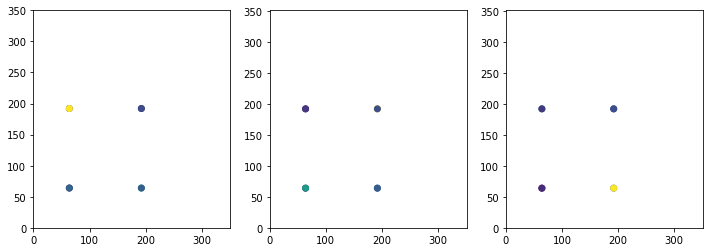

In [9]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
ife = 0

ivals = [(0, 1, 2), (1, 0, 2), (2, 0, 1)]

for ival in ivals:
    ip, i1, i2 = ival
    ax[ip].scatter(p.centers()[:,i1], p.centers()[:,i2], c = p.features[:,ife])
    ax[ip].set_xlim([0, vol_shape[i1]])
    ax[ip].set_ylim([0, vol_shape[i1]])

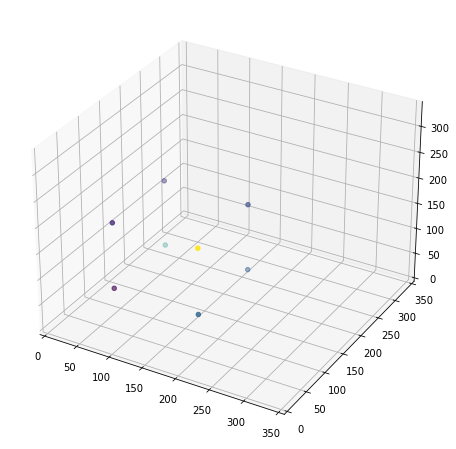

In [10]:
fig = plt.figure(figsize = (8,8))
plot_3D_feature(p, fig, plot_type = 'centers', ife = 0)